In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import vector
from pathlib import Path
import time
import DataHandling as DH
import Plotting as mplt
import warnings
warnings.filterwarnings('ignore')

# Try to import awkward for vector branch handling
try:
    import awkward as ak
    AWKWARD_AVAILABLE = True
except ImportError:
    AWKWARD_AVAILABLE = False

preSavefig='Plots/1108/'
sufSavefig='_1108.png'

In [ ]:
files = r""

# with uproot.open(files) as up:
#     # Read only the weight_mc_NOSYS branch and save to array
#     MC_weights_df = up["weight_mc_NOSYS"].array(library="np")
#     print(f"✅ Successfully read weight_mc_NOSYS branch")
#     print(f"📊 MC_weights_df shape: {MC_weights_df.shape}")
#     print(f"📈 MC weights range: [{MC_weights_df.min():.6f}, {MC_weights_df.max():.6f}]")# 

In [ ]:
# # Load DataFrame from pickle file

# start_time = time.time()
# df = pd.read_pickle('df_BCK_SGN.pkl')
# creation_time = time.time() - start_time

# print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 0.4579 seconds


In [3]:
# Define file path 
root_file_path =  r"_000001.output.root" 

# Check if file exists
if not Path(root_file_path).exists():
    print(f"❌ ROOT file not found: {root_file_path}")
    print("Please update the file path in the cell above.")
else:
    print(f"ROOT file found: {root_file_path}")
    
    # Load ROOT file to DataFrame
    print("\n🔄 Loading ROOT file...")
    start_time = time.time()
    
    df = DH.root_to_dataframe_essential(
        file_path=root_file_path,
        tree_name="reco",
        convert_units=True,
        verbose=False
    )
    
    load_time = time.time() - start_time
    print(f"\n Loading completed in {load_time:.2f} seconds")
    print(f" DataFrame ready with {len(df)} events and {len(df.columns)} columns")

ROOT file found: _000001.output.root

🔄 Loading ROOT file...

 Loading completed in 59.04 seconds
 DataFrame ready with 911148 events and 39 columns


In [4]:
#Save the dataframe to pickle file to avoid recomputing everytime
df.to_pickle('df_withWeights.pkl')

############

In [2]:
# Load DataFrame from pickle file
df_loaded = pd.read_pickle('df_withWeights.pkl')

Computing the needed 4 vectors and storing them in the dataframe

In [3]:
# Initialize the optimized FourVecHandler
handler = DH.FourVecHandler()

print("🚀 Starting OPTIMIZED 4-vector creation...")
print("   This will create all 8 four-vectors with minimal for loops!")

# Measure performance
start_time = time.time()

# Create all 8 four-vectors using the optimized function
df_with_4vecs = handler.create_all_4vectors(source_df=df_loaded,verbose=False)

creation_time = time.time() - start_time

print(f"\n⚡ OPTIMIZED creation completed in {creation_time:.2f} seconds")

🚀 Starting OPTIMIZED 4-vector creation...
   This will create all 8 four-vectors with minimal for loops!

⚡ OPTIMIZED creation completed in 736.81 seconds


In [4]:
print(f"📊 Performance: {len(df_with_4vecs)/creation_time:.1f} events per second")
print(f"🎯 Created {8} four-vectors + auxiliary columns for {len(df_with_4vecs)} events")

📊 Performance: 1236.6 events per second
🎯 Created 8 four-vectors + auxiliary columns for 911148 events


In [5]:
#Save the dataframe to pickle file to avoid recomputing everytime
df_with_4vecs.to_pickle('df_with_4vecs_wW.pkl')

: 

#################

### Loading the dataframe containing computed 4vecs

N.B. : We are loading the light version with only the essential half of variables

In [ ]:
start_time = time.time()
df_with_4vecs = pd.read_pickle('df_with_4vecs.pkl')
creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")

In [5]:
#Printing the dataframe to check correct loading
df_with_4vecs

,PDFinfo_PDGID1,PDFinfo_PDGID2,PDFinfo_Q,PDFinfo_X1,PDFinfo_X2,PDFinfo_XF1,PDFinfo_XF2,el_charge,el_eta,el_phi,...,up_4vec,had_b_4vec,lep_b_4vec,neutrino_4vec,lepton_4vec,had_t,lep_t,lepton_type,ttbar_4vec,beta
0,21,21,175.477707,0.018292,0.043399,5.279873,2.428524,[],[],[],...,"MomentumObject4D(pt=35.376197814941406, phi=-2...","MomentumObject4D(pt=49.75637435913086, phi=1.3...","MomentumObject4D(pt=80.4171142578125, phi=0.30...","MomentumObject4D(pt=52.23156518116804, phi=2.9...","MomentumObject4D(pt=36.034976959228516, phi=-1...","MomentumObject4D(pt=12.971276624613935, phi=-2...","MomentumObject4D(pt=18.748104745478543, phi=0....",muon,"MomentumObject4D(pt=12.382046348888538, phi=-0...",0.39923
1,21,21,199.347641,0.033969,0.072345,3.081088,1.338084,[-1.0],[0.019284088],[0.8802953],...,"MomentumObject4D(pt=31.418272018432617, phi=-1...","MomentumObject4D(pt=118.49435424804688, phi=2....","MomentumObject4D(pt=62.8841552734375, phi=-0.5...","MomentumObject4D(pt=11.29231493910977, phi=-1....","MomentumObject4D(pt=61.640541076660156, phi=0....","MomentumObject4D(pt=84.08818596013978, phi=2.9...","MomentumObject4D(pt=87.289789982584, phi=0.021...",electron,"MomentumObject4D(pt=17.572344099096757, phi=1....",0.490863
2,21,21,175.820526,0.212367,0.054992,0.210094,1.879462,[],[],[],...,"MomentumObject4D(pt=135.8825225830078, phi=-1....","MomentumObject4D(pt=61.62810516357422, phi=2.9...","MomentumObject4D(pt=109.79779815673828, phi=-2...","MomentumObject4D(pt=41.1291942560704, phi=-3.0...","MomentumObject4D(pt=39.138710021972656, phi=-1...","MomentumObject4D(pt=217.0454750825755, phi=-2....","MomentumObject4D(pt=148.61508511282366, phi=-2...",muon,"MomentumObject4D(pt=361.7784100537605, phi=-2....",0.890895
3,21,21,184.677887,0.050892,0.016144,2.043449,5.821816,[1.0],[1.0029755],[3.1009815],...,"MomentumObject4D(pt=65.02371978759766, phi=-0....","MomentumObject4D(pt=62.58217239379883, phi=1.3...","MomentumObject4D(pt=35.11328887939453, phi=0.9...","MomentumObject4D(pt=35.821755863971255, phi=-2...","MomentumObject4D(pt=33.15223693847656, phi=3.1...","MomentumObject4D(pt=28.455146146153126, phi=-0...","MomentumObject4D(pt=27.879776033905724, phi=-3...",electron,"MomentumObject4D(pt=10.291829485592269, phi=-1...",0.533994
4,21,21,182.340729,0.074167,0.014212,1.305422,6.411271,[],[],[],...,"MomentumObject4D(pt=83.33775329589844, phi=1.8...","MomentumObject4D(pt=31.728225708007812, phi=2....","MomentumObject4D(pt=53.85918045043945, phi=-0....","MomentumObject4D(pt=46.45360132027916, phi=-0....","MomentumObject4D(pt=36.46967315673828, phi=-2....","MomentumObject4D(pt=138.24381757730634, phi=2....","MomentumObject4D(pt=96.60617493126811, phi=-1....",muon,"MomentumObject4D(pt=43.39289860174294, phi=2.3...",0.435009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911143,21,21,254.847504,0.039080,0.050805,2.657006,2.007821,[],[],[],...,"MomentumObject4D(pt=159.6160125732422, phi=-0....","MomentumObject4D(pt=32.94810485839844, phi=0.4...","MomentumObject4D(pt=38.77629852294922, phi=0.4...","MomentumObject4D(pt=127.08344446308541, phi=2....","MomentumObject4D(pt=61.388023376464844, phi=-2...","MomentumObject4D(pt=246.90421780824477, phi=-0...","MomentumObject4D(pt=142.46301799000602, phi=2....",muon,"MomentumObject4D(pt=104.56788678528957, phi=-0...",0.259679
911144,21,21,231.103027,0.064083,0.019838,1.538785,4.940284,[],[],[],...,"MomentumObject4D(pt=84.85799407958984, phi=-3....","MomentumObject4D(pt=34.719581604003906, phi=-1...","MomentumObject4D(pt=80.201416015625, phi=-0.84...","MomentumObject4D(pt=20.544440618901067, phi=2....","MomentumObject4D(pt=95.40513610839844, phi=0.5...","MomentumObject4D(pt=85.5972095299252, phi=3.10...","MomentumObject4D(pt=125.83200351415749, phi=0....",muon,"MomentumObject4D(pt=40.94928754059125, phi=0.1...",0.673129
911145,21,21,188.113983,0.047282,0.017741,2.210978,5.409729,[1.0],[0.29584903],[1.6508919],...,"MomentumObject4D(pt=50.544708251953125, phi=-1...","Momen

### Studying the invariant masses of had_t & lep_t and applying a cut to keep only physical events

In [6]:
start_time = time.time()
had_t_mass=np.empty(len(df_with_4vecs))
lep_t_mass=np.empty(len(df_with_4vecs))

for i in range(len(df_with_4vecs)):
    had_t_mass[i] = df_with_4vecs['had_t'][i].mass
    lep_t_mass[i] = df_with_4vecs['lep_t'][i].mass

creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 60.0907 seconds


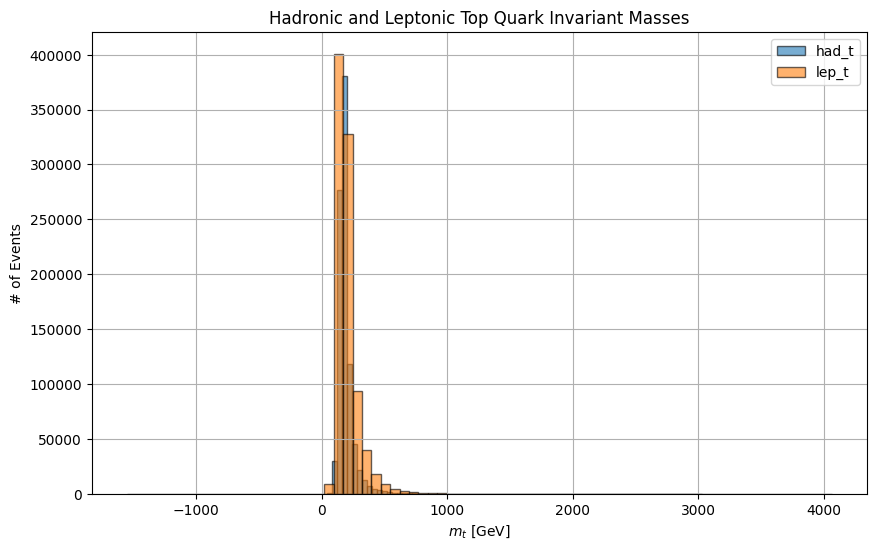

In [7]:
plt.figure(figsize=(10, 6))
n_had,_,_=plt.hist(had_t_mass, bins=75, alpha=0.6, edgecolor='black', density=False, label='had_t')
n_lep,_,_=plt.hist(lep_t_mass, bins=75, alpha=0.6, edgecolor='black', density=False, label='lep_t')

plt.xlabel(r'$m_{t}$ [GeV]')
plt.ylabel("# of Events")
# plt.xticks(np.arange(-200, 1100, 50),rotation=45)
plt.title('Hadronic and Leptonic Top Quark Invariant Masses')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.show()

# print("N_had events:", n_had.sum(),len(had_t_mass))
# print("N_lep events:", n_lep, len(lep_t_mass))

In [8]:
#Some info about the masses
print("=" * 80)
print(f'------------------------------- Informative panel ------------------------------')
print("=" * 80)
print(f"| Total number of Lep t masses : {len(lep_t_mass)} \t\t\t\t\t|")
print(f"| Total number of Had t masses : {len(had_t_mass)} \t\t\t\t\t|")
print("=" * 80)
print(f"| Total number of Lep t masses < 0 : {len(lep_t_mass[lep_t_mass<0])} || relative fraction: {(len(lep_t_mass[lep_t_mass<0])/len(lep_t_mass))*100:.3f}% \t\t|")
print(f"| Total number of Had t masses < 0 : {len(had_t_mass[had_t_mass<0])} || relative fraction: {(len(lep_t_mass[had_t_mass<0])/len(had_t_mass))*100:.3f}% \t\t| ")
print("=" * 80)
print(f"| Total number of Lep t masses > 1 TeV : {len(lep_t_mass[lep_t_mass>1000])} || relative fraction: {(len(lep_t_mass[lep_t_mass>1000])/len(lep_t_mass))*100:.3f}% \t| ")
print(f"| Total number of Had t masses > 1 TeV : {len(had_t_mass[had_t_mass>1000])} || relative fraction: {(len(lep_t_mass[had_t_mass>1000])/len(had_t_mass))*100:.3f}% \t| ")
print("=" * 80)
varCut=(len(lep_t_mass[lep_t_mass>1000])+len(had_t_mass[had_t_mass>1000])+len(lep_t_mass[lep_t_mass<0])+len(had_t_mass[had_t_mass<0]))
print(f"| Total number of cut : {varCut} || relative fraction: {(varCut)/len(lep_t_mass)*100:.3f}% \t\t\t|")
print("=" * 80)
print(f"| Remaining data after cut : {len(lep_t_mass)-varCut} || relative fraction: {((len(lep_t_mass)-varCut)/len(lep_t_mass)*100):.3f}% \t\t|")
print("=" * 80)


------------------------------- Informative panel ------------------------------
| Total number of Lep t masses : 911148 					|
| Total number of Had t masses : 911148 					|
| Total number of Lep t masses < 0 : 840 || relative fraction: 0.092% 		|
| Total number of Had t masses < 0 : 0 || relative fraction: 0.000% 		| 
| Total number of Lep t masses > 1 TeV : 1186 || relative fraction: 0.130% 	| 
| Total number of Had t masses > 1 TeV : 884 || relative fraction: 0.097% 	| 
| Total number of cut : 2910 || relative fraction: 0.319% 			|
| Remaining data after cut : 908238 || relative fraction: 99.681% 		|


In [9]:
# Create mask for reasonable mass range
mass_min, mass_max = 0, 1000  # GeV
mask_had = (had_t_mass>= mass_min) & (had_t_mass <= mass_max)
mask_lep = (lep_t_mass>= mass_min) & (lep_t_mass <= mass_max)

# Create combined mask (&)
combined_mask_and = mask_had & mask_lep

# Apply the combined mask to filter the DataFrame
df_cut = df_with_4vecs[combined_mask_and].copy()

# Also filter the mass arrays for consistency
had_t_mass_cut = had_t_mass[combined_mask_and]
lep_t_mass_cut = lep_t_mass[combined_mask_and]

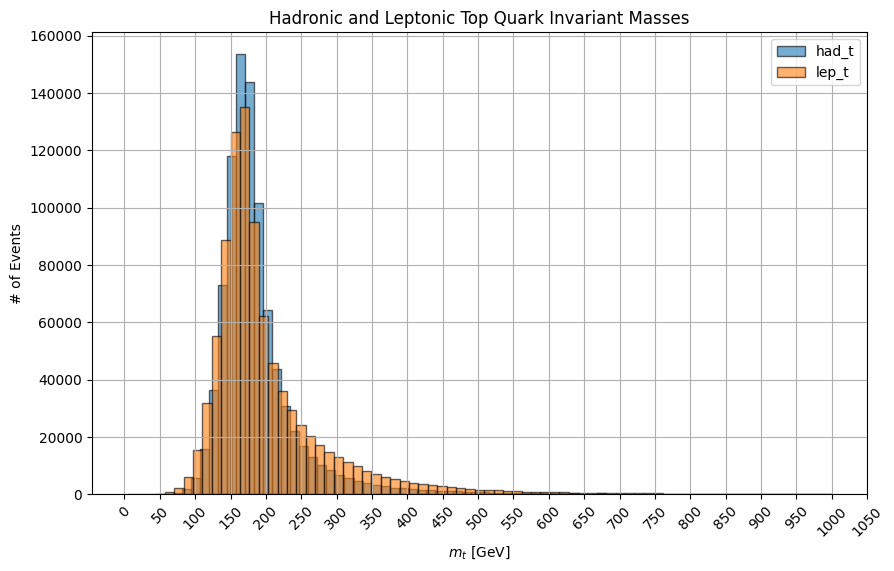

In [11]:
#Zoomed distributions
plt.figure(figsize=(10, 6))

n_had,_,_=plt.hist(had_t_mass_cut, bins=75, alpha=0.6, edgecolor='black', density=False, label='had_t')
n_had,_,_=plt.hist(lep_t_mass_cut, bins=75, alpha=0.6, edgecolor='black', density=False, label='lep_t')

plt.xlabel(r'$m_{t}$ [GeV]')
plt.ylabel("# of Events")
plt.xticks(np.arange(0, 1100, 50),rotation=45)
plt.title('Hadronic and Leptonic Top Quark Invariant Masses')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
# plt.savefig(preSavefig+'Had_lep_t_mass_ZOOM'+sufSavefig)
plt.show()


In [12]:
print("=" * 80)
print(f"| Total number of Lep t masses : {len(lep_t_mass_cut)} \t\t\t\t\t|")
print(f"| Total number of Had t masses : {len(had_t_mass_cut)} \t\t\t\t\t|")
print(f"| Len of df_cut df : {len(df_cut)} \t\t\t\t\t\t\t|")
print("=" * 80)

| Total number of Lep t masses : 908258 					|
| Total number of Had t masses : 908258 					|
| Len of df_cut df : 908258 							|


In [13]:
#Computing the other needed variables with the new dataframe
start_time = time.time()

ttbar_mass_cut=np.empty(len(df_cut))
ttbar_betaz_cut=np.empty(len(df_cut))
ttbar_pT=np.empty(len(df_cut))

for j in range(len(df_cut)):
    ttbar_mass_cut[j] = df_cut['ttbar_4vec'].iloc[j].m
    ttbar_betaz_cut[j] = df_cut['ttbar_4vec'].iloc[j].pz/df_cut['ttbar_4vec'].iloc[j].e
    ttbar_pT[j]=df_cut['ttbar_4vec'].iloc[j].pt
    
creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 98.9238 seconds


## Physics Object Distributions

Plot distributions of key physics variables including the optimized neutrino properties.

In [14]:
# Define columns to plot with their display names
columns_to_plot = {
    # Muon properties
    'mu_eta': 'Muon η (Pseudorapidity)',
    'mu_phi': 'Muon φ [rad]', 
    'mu_e_NOSYS': 'Muon Energy [GeV]',
    'mu_pt_NOSYS': 'Muon pT [GeV]',
    
    # Electron properties  
    'el_eta': 'Electron η (Pseudorapidity)',
    'el_phi': 'Electron φ [rad]',
    'el_e_NOSYS': 'Electron Energy [GeV]', 
    'el_pt_NOSYS': 'Electron pT [GeV]',
    
    # Jet properties
    'jet_eta': 'Jet η (Pseudorapidity)',
    'jet_phi': 'Jet φ [rad]',
    'jet_e_NOSYS': 'Jet Energy [GeV]',
    'jet_pt_NOSYS': 'Jet pT [GeV]',
    
    # Neutrino momentum components
    'TtbarLjetsNu_spanet_reg_nu_px_NOSYS': 'Neutrino px [GeV]',
    'TtbarLjetsNu_spanet_reg_nu_py_NOSYS': 'Neutrino py [GeV]',
    'TtbarLjetsNu_spanet_reg_nu_pz_NOSYS': 'Neutrino pz [GeV]',
    'TtbarLjetsNu_spanet_reg_nu_eta_NOSYS': 'Neutrino η (Pseudorapidity)'
}

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/1108/PhysicsObjDistribution_cut_1108.png'

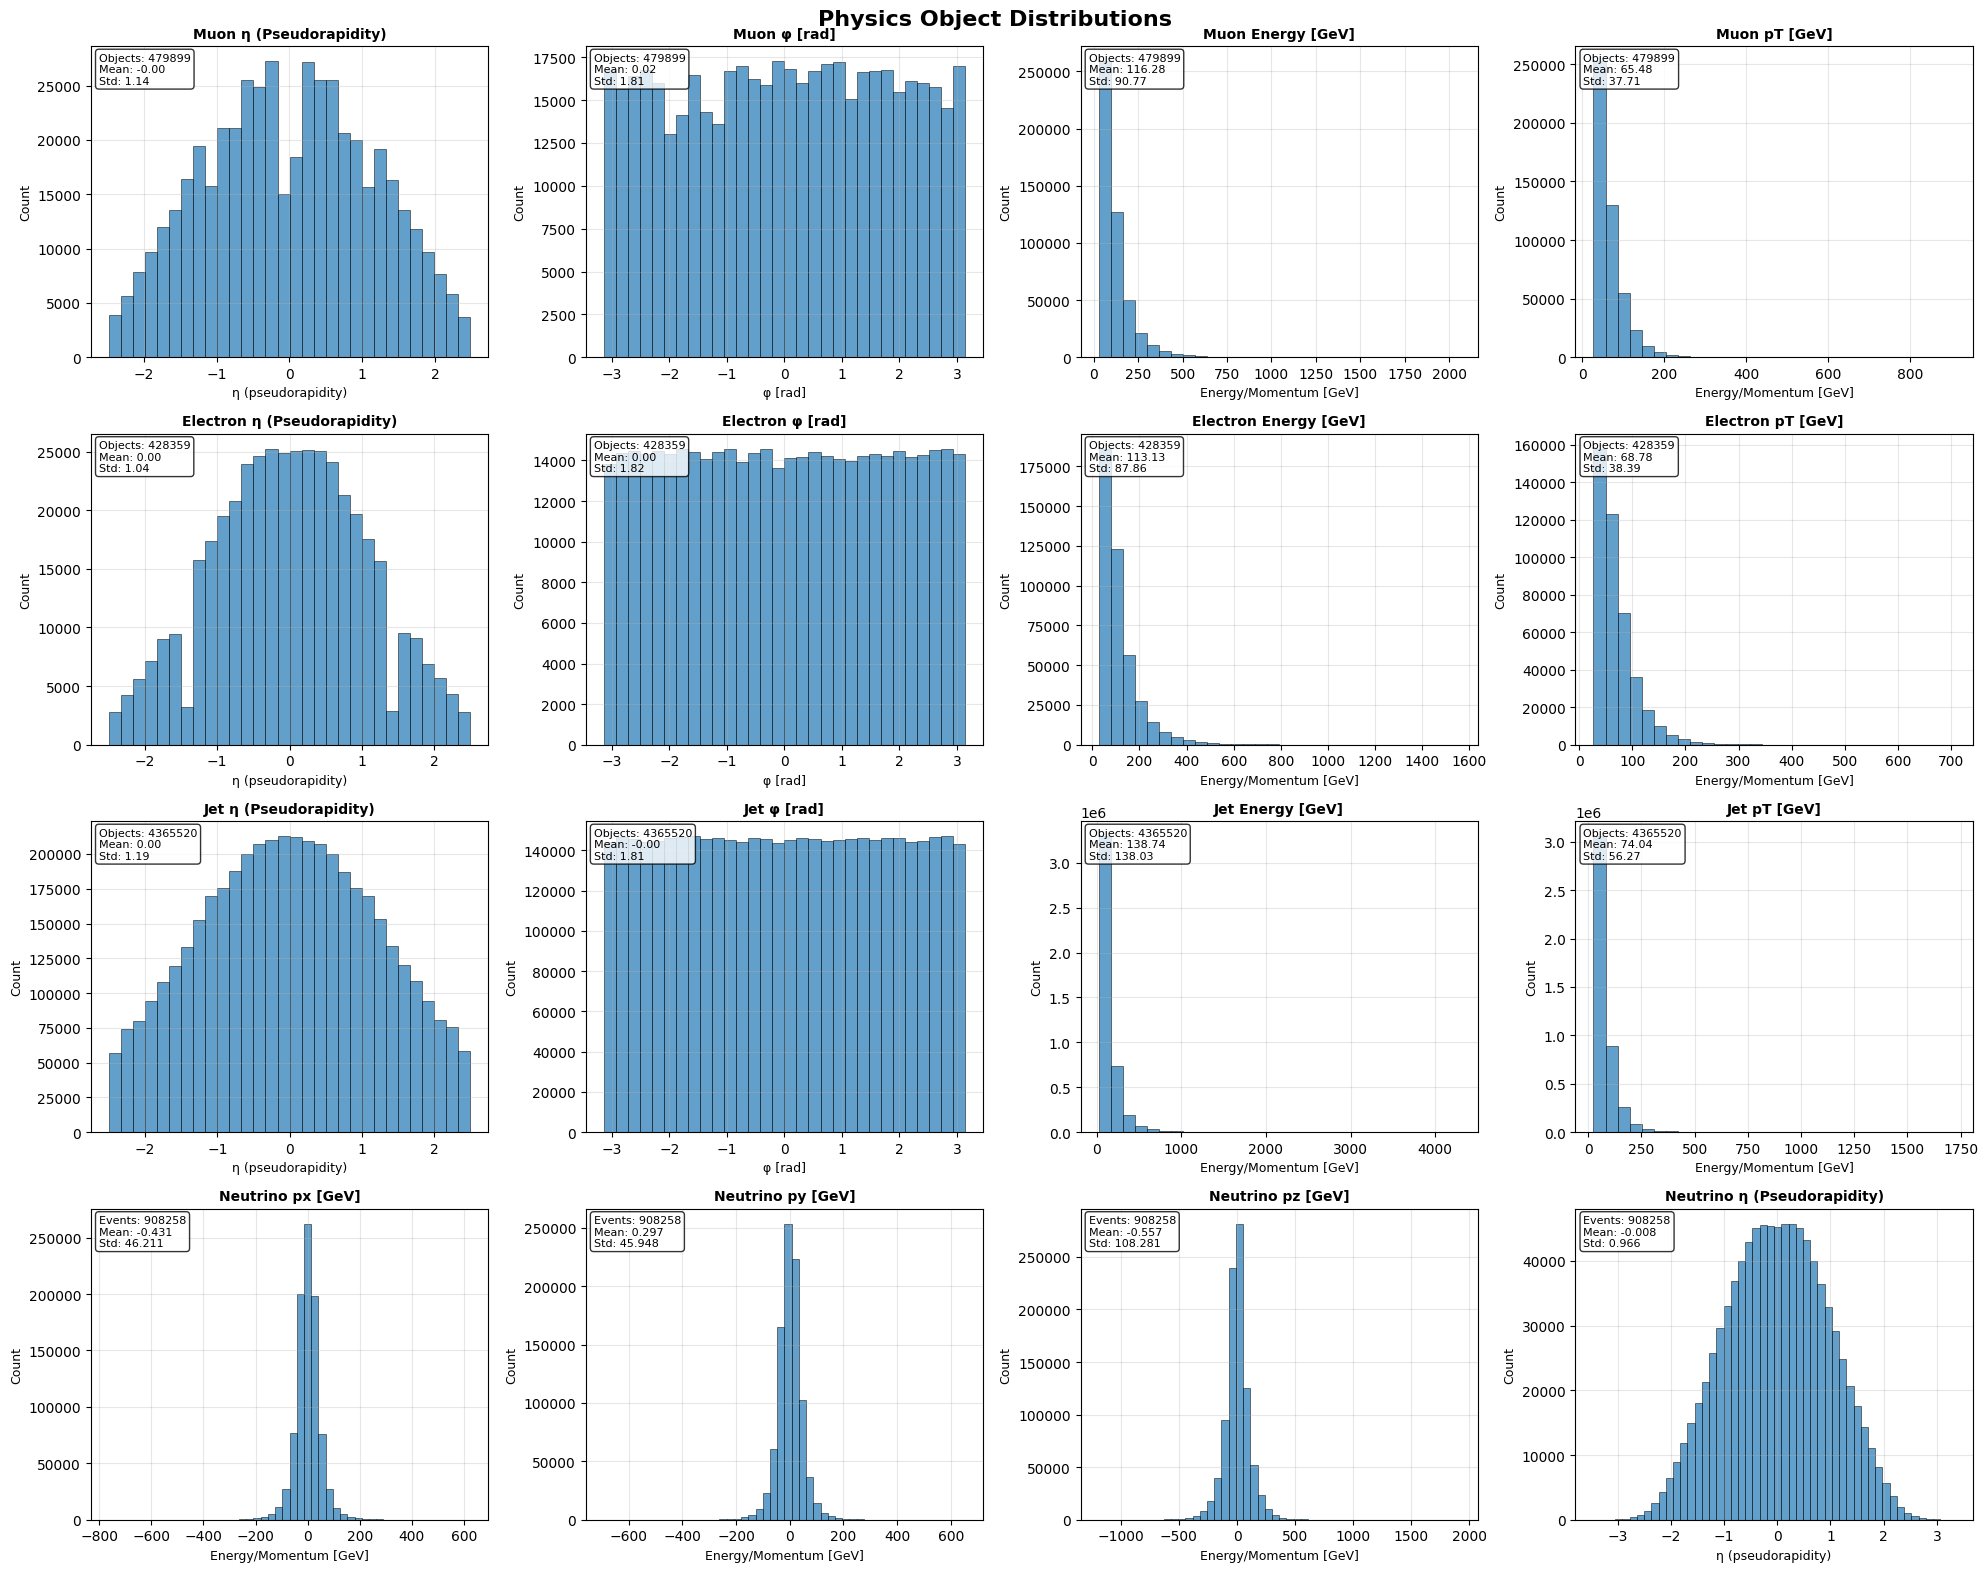

In [15]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Physics Object Distributions', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
axes_flat = axes.flatten()

for idx, (column, title) in enumerate(columns_to_plot.items()):
    ax = axes_flat[idx]
    
    if column in df_with_4vecs.columns:
        data = df_cut[column]
        
        # Check if data contains arrays (vector branch) or scalars
        sample_value = data.iloc[0]
        
        if isinstance(sample_value, (list, np.ndarray)) and hasattr(sample_value, '__len__'):
            # Vector branch - flatten all arrays
            all_values = []
            for event_data in data:
                if isinstance(event_data, (list, np.ndarray)) and len(event_data) > 0:
                    # Check if elements are not NaN before adding
                    valid_values = [val for val in event_data if not pd.isna(val)]
                    all_values.extend(valid_values)
            
            if len(all_values) > 0:
                plot_data = np.array(all_values)
                ax.hist(plot_data, bins=30, alpha=0.7, edgecolor='black', linewidth=0.5)
                
                # Add statistics
                stats_text = f'Objects: {len(plot_data)}\nMean: {plot_data.mean():.2f}\nStd: {plot_data.std():.2f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            else:
                ax.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=ax.transAxes)
        else:
            # Scalar branch or optimized neutrino columns
            plot_data = data.dropna()
            
            if len(plot_data) > 0:
                ax.hist(plot_data, bins=50, alpha=0.7, edgecolor='black', linewidth=0.5)
                
                # Add statistics
                stats_text = f'Events: {len(plot_data)}\nMean: {plot_data.mean():.3f}\nStd: {plot_data.std():.3f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            else:
                ax.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=ax.transAxes)
    else:
        ax.text(0.5, 0.5, f'Column\n{column}\nnot found', ha='center', va='center', transform=ax.transAxes)
    
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Set labels
    if 'GeV' in title:
        ax.set_xlabel('Energy/Momentum [GeV]', fontsize=9)
    elif 'η' in title:
        ax.set_xlabel('η (pseudorapidity)', fontsize=9)
    elif 'φ' in title:
        ax.set_xlabel('φ [rad]', fontsize=9)
    
    ax.set_ylabel('Count', fontsize=9)

plt.tight_layout()
# plt.savefig(preSavefig+'PhysicsObjDistribution_cut'+sufSavefig)
plt.show()


print("✅ Physics object distributions plotted successfully!")

## Event Type Classification

Classify events based on the initial parton types using PDG IDs from the PDF information.
- **gg**: gluon-gluon collision (col1=21, col2=21)
- **qq**: quark-quark collision (col1≠21, col2≠21) 
- **gq**: gluon-quark collision (one is 21, the other is not)

In [16]:
# Apply the function to classify production types
df_cut = DH.production_classification(df_cut, verbose=True)

🚀 Creating event type classification based on PDG IDs
✅ Production type classification completed!

📊 Event type distribution:
   • gg: 794,173 events (87.4%)
   • qq: 81,153 events (8.9%)
   • gq: 32,932 events (3.6%)

🎯 Total classified events: 908,258
✅ All events successfully classified!


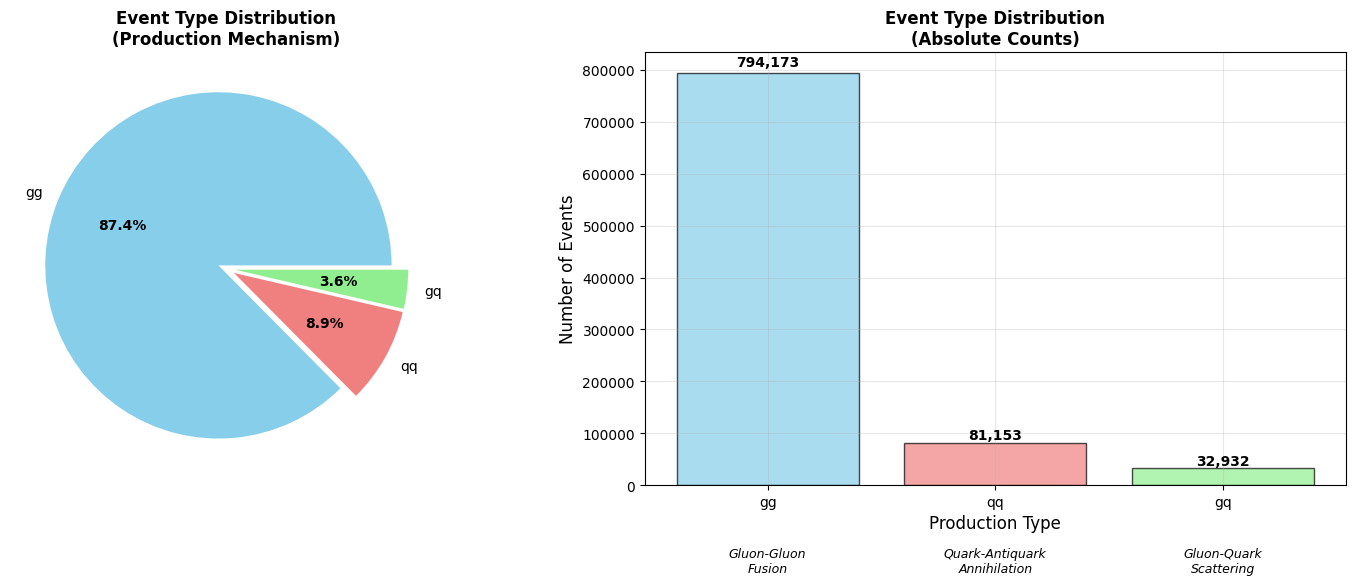

In [19]:
# Apply the function to visualize production types
fig = mplt.plot_prod_classification(df_cut,'PieChart.png')

### Number of jets per production type

In [20]:
# Apply the function to analyze jets per event
fig, jets_per_event, statistics = mplt.plot_jets_per_event_distribution(
    df=df_cut, 
    jet_col='jet_eta',
    save_plot=True,
    save_path='jets_per_event_analysis.png'
)

AttributeError: module 'Plotting' has no attribute 'plot_jets_per_event_distribution'

### Useful plots

In [ ]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,_,_=plt.hist(ttbar_mass_cut, bins=75, alpha=0.6, edgecolor='black', density=False, label=r'ttbar mass')

plt.xlabel(r'$m_{ttbar}$ [GeV] ')
plt.ylabel("# of Events")
plt.xticks(np.arange(0,4100, 200),rotation=45)
plt.title('Distribution of ttbar invariant masses for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
plt.savefig(preSavefig+'ttbar_minv_cut'+sufSavefig)
plt.show()

In [ ]:
# Apply the function to analyze ttbar mass
fig = mplt.plot_variable_by_production_type_normalized1(
    df=df_cut, 
    variable_array=ttbar_mass_cut,
    variable_name="ttbar mass",
    FileName=preSavefig+'ttbar_minv_prod_type_norm1'+sufSavefig,
    xlabel=r'$m_{ttbar}$ [GeV]',
    title_prefix=r'ttbar Mass Distribution',
    overlay_bins=50
)

In [29]:
weightarr=np.array(df_cut['weight_mc_NOSYS'])
type(weightarr)

# Save the weight array
np.save('weightarr.npy', weightarr)
print(f"✅ Saved weightarr with shape {weightarr.shape} to weightarr.npy")

✅ Saved weightarr with shape (908258,) to weightarr.npy


## $\Delta \eta$, $\Delta R$ for b jets

In [21]:
#Computing the other needed variables with the new dataframe
start_time = time.time()
bbbar_deltaeta=np.empty(len(df_cut))
bbbar_deltaR=np.empty(len(df_cut))
ttbar_deltaeta=np.empty(len(df_cut))
ttbar_deltaR=np.empty(len(df_cut))

for j in range(len(df_cut)):
    bbbar_deltaeta[j]=df_cut['had_b_4vec'].iloc[j].deltaeta(df_cut['lep_b_4vec'].iloc[j])
    bbbar_deltaR[j]=df_cut['had_b_4vec'].iloc[j].deltaR(df_cut['lep_b_4vec'].iloc[j])
    ttbar_deltaeta[j]=df_cut['had_t'].iloc[j].deltaeta(df_cut['lep_t'].iloc[j])
    ttbar_deltaR[j]=df_cut['had_t'].iloc[j].deltaR(df_cut['lep_t'].iloc[j])

creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 231.5504 seconds


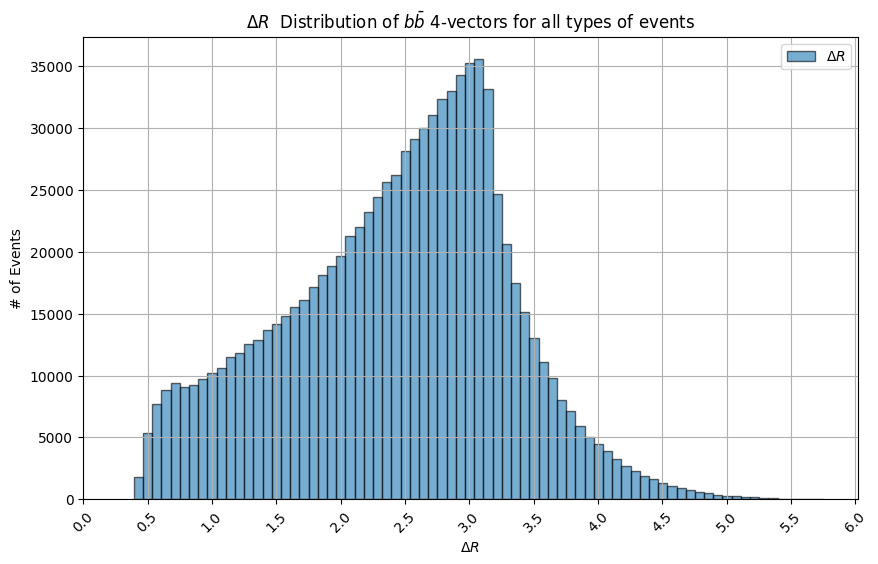

In [22]:
#Plotting beta distribution for all type of events
plt.figure(figsize=(10, 6))
n_had,bins_out,patches=plt.hist(bbbar_deltaR, bins=75, alpha=0.6, edgecolor='black', density=False, label=r'$\Delta R$')

plt.xlabel(r'$\Delta R$ ')
plt.ylabel("# of Events")
plt.xticks(np.arange(0,6.5, 0.5),rotation=45)
plt.title(r'$\Delta R~$ Distribution of $b\bar{b}$ 4-vectors for all types of events')
plt.grid(True)
# plt.xlim(0,600)
plt.legend()
# plt.savefig(preSavefig+'DeltaR_bbar_all'+sufSavefig)
plt.show()

#### Chel (cosPhi)

In [23]:
#Computing cos Phi
start_time = time.time()


ttbar_D_variable=np.empty(len(df_cut))  # New D variable

for j in range(len(df_cut)):
    
    # Calculate D variable
    ttbar_D_variable[j] = DH.calculateD(
        ttbar_4vec=df_cut['ttbar_4vec'].iloc[j],
        thad_4vec=df_cut['had_t'].iloc[j],
        tlep_4vec=df_cut['lep_t'].iloc[j], 
        down_4vec=df_cut['down_4vec'].iloc[j], 
        lep_4vec=df_cut['lepton_4vec'].iloc[j],
        apply_ttbar_boost=True
    )
    
creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")
print(f"📊 D variable statistics:")
print(f"   • Valid calculations: {np.sum(ttbar_D_variable != -55.0)}")
print(f"   • Failed calculations: {np.sum(ttbar_D_variable == -55.0)}")

# Only show statistics if there are valid calculations
valid_D_values = ttbar_D_variable[ttbar_D_variable != -55.0]
if len(valid_D_values) > 0:
    print(f"   • Mean D (valid only): {np.mean(valid_D_values):.4f}")
    print(f"   • Range: [{np.min(valid_D_values):.4f}, {np.max(valid_D_values):.4f}]")
else:
    print(f"   • No valid D calculations available")

AttributeError: module 'DataHandling' has no attribute 'calculateD'

In [ ]:
# Plot D variable distribution by production type
print("🔬 D Variable Analysis by Production Type")
print("=" * 50)

# Filter out failed calculations (-55.0)
valid_mask = ttbar_D_variable != -55.0
D_valid = ttbar_D_variable[valid_mask]
df_cut_valid = df_cut[valid_mask].reset_index(drop=True)

print(f"Valid D calculations: {len(D_valid)} out of {len(ttbar_D_variable)} ({100*len(D_valid)/len(ttbar_D_variable):.1f}%)")

if len(D_valid) > 0:
    # Apply the function to analyze D variable
    fig = mplt.plot_variable_by_production_type(
        df=df_cut_valid, 
        variable_array=D_valid,
        variable_name="D variable",
        FileName=preSavefig+'D_variable_prod_type'+sufSavefig,
        xlabel=r'D = cos($\phi_{l,j}$)',
        title_prefix=r'D Variable Distribution',
        overlay_bins=50
    )
    
    # Also create the general distribution plot
    plt.figure(figsize=(10, 6))
    plt.hist(D_valid, bins=50, alpha=0.7, edgecolor='black', density=True, label='D variable')
    plt.xlabel(r'D = cos($\phi_{l,j}$)')
    plt.ylabel('# of Events')
    plt.title('D Variable Distribution (angle between lepton and down-type quark)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add statistics
    stats_text = (f'Events: {len(D_valid):,}\n'
                 f'Mean: {D_valid.mean():.4f}\n'
                 f'Std: {D_valid.std():.4f}\n'
                 f'Range: [{D_valid.min():.3f}, {D_valid.max():.3f}]')
    # plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             # verticalalignment='top', fontsize=10,
             # bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.savefig(preSavefig+'D_variable_all'+sufSavefig)
    plt.show()
    
else:
    print("❌ No valid D variable calculations to plot")

#### Chan

In [ ]:
# 🔬 Calculate C_han Variable (Corrected Approach)
print("🔬 Computing C_han Variable")
print("=" * 60)

# Initialize C_han array
ttbar_Cos_han_variable = np.full(len(df_cut), -55.0)

# Calculate C_han for each event
successful_calculations = 0
start_time = time.time()

for j in range(len(df_cut)):
    try:
        ttbar_Cos_han_variable[j] = DH.calculateCosHan(
            ttbar_4vec=df_cut['ttbar_4vec'].iloc[j],
            thad_4vec=df_cut['had_t'].iloc[j],
            tlep_4vec=df_cut['lep_t'].iloc[j],
            down_4vec=df_cut['down_4vec'].iloc[j],
            lep_4vec=df_cut['lepton_4vec'].iloc[j],
            apply_ttbar_boost=True
        )
        
        if ttbar_Cos_han_variable[j] != -55.0:
            successful_calculations += 1
            
    except Exception as e:
        ttbar_Cos_han_variable[j] = -55.0
        continue

end_time = time.time()

print(f"\n⚡ Computation completed in {end_time - start_time:.4f} seconds")
print(f"📊 C_han variable statistics:")
print(f"   • Valid calculations: {successful_calculations}")
print(f"   • Failed calculations: {len(df_cut) - successful_calculations}")
print(f"   • Success rate: {successful_calculations/len(df_cut)*100:.1f}%")

# Check the results
if successful_calculations > 0:
    valid_chan = ttbar_Cos_han_variable[ttbar_Cos_han_variable != -55.0]
    print(f"   • C_han range: [{np.min(valid_chan):.4f}, {np.max(valid_chan):.4f}]")
    print(f"   • Mean C_han: {np.mean(valid_chan):.4f}")
    print(f"   • Values in [-1,1]: {np.sum((valid_chan >= -1) & (valid_chan <= 1))}/{len(valid_chan)}")
    
    print("\n✅ C_han calculation completed successfully!")
    print("💡 Ready to plot with corrected C_han values")
else:
    print("\n❌ All C_han calculations failed")
    print("💡 May need to check boost direction (try negative boost like ROOT code)")

In [ ]:
# Plot C_han distribution by production type 
print("🔬 C_han Analysis by Production Type")
print("=" * 50)

# Create valid C_han array (excluding failed calculations)
valid_mask = ttbar_Cos_han_variable != -55.0
C_han_valid = ttbar_Cos_han_variable[valid_mask]

print(f"Valid C_han calculations: {len(C_han_valid)} out of {len(ttbar_Cos_han_variable)} ({100*len(C_han_valid)/len(ttbar_Cos_han_variable):.1f}%)")

if len(C_han_valid) > 100:  # Need sufficient data for meaningful plots
    print(f"📊 Plotting C_han distribution with {len(C_han_valid)} valid values")
    
    # Apply the function to analyze C_han (same style as cos(θ*))
    fig = mplt.plot_variable_by_production_type(
        df=df_cut, 
        variable_array=ttbar_Cos_han_variable,
        variable_name="C_han",
        FileName=preSavefig+'Chan_prod_type'+sufSavefig,
        xlabel=r'$C_{han}$',
        title_prefix=r'C han Variable Distribution',
        overlay_bins=50
    )
    
    # Additional simple plot
    plt.figure(figsize=(10, 6))
    plt.hist(C_han_valid, bins=50, alpha=0.7, edgecolor='black',
             label='C_han')
    plt.xlabel(r'$C_{han}$')
    plt.ylabel('Events')
    plt.title('C_han Distribution (angle between lepton and down-quark with z-flip)')
    plt.legend()
    plt.grid(True, alpha=0.3)    
    plt.tight_layout()
    plt.savefig(preSavefig+'C_han_all'+sufSavefig)
    plt.show()
    
    print("\\n💡 C_han measures the correlation between leptons with z-component flip")
    print("✅ C_han plots created successfully!")

else:
    print("❌ No valid C_han calculations to plot")
    print("💡 Check the corrected calculation results")

### cos $\theta^*$

In [ ]:
# Compute cos(theta*) variables for the dataset
print("🔬 Computing cos(θ*) Variables for Hadronic and Leptonic Tops")
print("=" * 65)

start_time = time.time()

# Initialize arrays for both tops
ttbar_CosTstar_had = np.empty(len(df_cut))  # cos(θ*) for hadronic top
ttbar_CosTstar_lep = np.empty(len(df_cut))  # cos(θ*) for leptonic top

for j in range(len(df_cut)):
    # Calculate cos(θ*) for hadronic top
    ttbar_CosTstar_had[j] = DH.calculateCosTstar(
        top_4vec=df_cut['had_t'].iloc[j],
        ttbar_4vec=df_cut['ttbar_4vec'].iloc[j]
    )
    
    # Calculate cos(θ*) for leptonic top
    ttbar_CosTstar_lep[j] = DH.calculateCosTstar(
        top_4vec=df_cut['lep_t'].iloc[j],
        ttbar_4vec=df_cut['ttbar_4vec'].iloc[j]
    )

creation_time = time.time() - start_time

print(f"\n⚡ Computation completed in {creation_time:.4f} seconds")

# Statistics for hadronic top
valid_had = ttbar_CosTstar_had != -55.0
print(f"\n📊 cos(θ*) for Hadronic Top:")
print(f"   • Valid calculations: {np.sum(valid_had)} out of {len(ttbar_CosTstar_had)} ({100*np.sum(valid_had)/len(ttbar_CosTstar_had):.1f}%)")
if np.sum(valid_had) > 0:
    valid_values_had = ttbar_CosTstar_had[valid_had]
    print(f"   • Mean: {np.mean(valid_values_had):.4f}")
    print(f"   • Std: {np.std(valid_values_had):.4f}")
    print(f"   • Range: [{np.min(valid_values_had):.4f}, {np.max(valid_values_had):.4f}]")

# Statistics for leptonic top
valid_lep = ttbar_CosTstar_lep != -55.0
print(f"\n📊 cos(θ*) for Leptonic Top:")
print(f"   • Valid calculations: {np.sum(valid_lep)} out of {len(ttbar_CosTstar_lep)} ({100*np.sum(valid_lep)/len(ttbar_CosTstar_lep):.1f}%)")
if np.sum(valid_lep) > 0:
    valid_values_lep = ttbar_CosTstar_lep[valid_lep]
    print(f"   • Mean: {np.mean(valid_values_lep):.4f}")
    print(f"   • Std: {np.std(valid_values_lep):.4f}")
    print(f"   • Range: [{np.min(valid_values_lep):.4f}, {np.max(valid_values_lep):.4f}]")

print(f"\n💡 cos(θ*) measures the angular distribution of top quarks in the ttbar rest frame")
print(f"   • Values close to ±1: top aligned/anti-aligned with ttbar direction")
print(f"   • Values close to 0: top perpendicular to ttbar direction")
print(f"   • Important for studying top quark spin correlations and production dynamics")

### Creating the output df to feed to DNN

In [ ]:
# Create new output dataframe with selected columns and computed arrays
print("📊 Creating df_output with selected columns and computed arrays")
print("=" * 60)

# Group 1: Columns to copy from df_cut
df_cut_columns = [
    'beta','prod_type'
]

# Group 2: Arrays to add as new columns (with their names)
array_columns = {
    'ttbar_mass_cut': ttbar_mass_cut,
    'ttbar_betaz_cut_abs': abs(ttbar_betaz_cut),
    'ttbar_pT': ttbar_pT,
    'jets_per_event': jets_per_event,
    'bbbar_deltaeta': bbbar_deltaeta,
    'bbbar_deltaR': bbbar_deltaR,
    'ttbar_deltaeta': ttbar_deltaeta,
    'ttbar_deltaR': ttbar_deltaR,
    'ttbar_D_variable': ttbar_D_variable,
    'ttbar_Cos_han_variable': ttbar_Cos_han_variable,
    'ttbar_CosTstar_had': ttbar_CosTstar_had,
    'ttbar_CosTstar_lep': ttbar_CosTstar_lep
}

# Start with copying the specified columns from df_cut
print("🔄 Copying columns from df_cut...")
df_output = df_cut[df_cut_columns].copy()

# Add the computed arrays as new columns
print("🔄 Adding computed arrays as new columns...")
for column_name, array_data in array_columns.items():
    # Ensure array length matches dataframe length
    if len(array_data) == len(df_output):
        df_output[column_name] = array_data
        print(f"   ✅ Added {column_name}: {len(array_data)} values")
    else:
        print(f"   ❌ Skipped {column_name}: length mismatch ({len(array_data)} vs {len(df_output)})")

# Display information about the new dataframe
print(f"\n📈 df_output Statistics:")
print(f"   • Shape: {df_output.shape}")
print(f"   • Total columns: {len(df_output.columns)}")
print(f"   • Memory usage: {df_output.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📋 df_output Columns:")
print("   Original df_cut columns:")
for col in df_cut_columns:
    if col in df_output.columns:
        print(f"      ✅ {col}")
    else:
        print(f"      ❌ {col} (not found in df_cut)")

print("   New array columns:")
for col_name in array_columns.keys():
    if col_name in df_output.columns:
        print(f"      ✅ {col_name}")
    else:
        print(f"      ❌ {col_name} (failed to add)")

print(f"\n✅ df_output created successfully!")
print(f"💾 Ready for analysis and export")


In [ ]:
#Saving the new df
df_output.to_pickle('df_outputDNN2.pkl')